In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random 

%matplotlib inline


In [4]:
mnist=input_data.read_data_sets('data/MNIST',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [7]:
def show_digits(pixels):
    img=pixels.reshape(28,28)
    plt.axis('off')
    plt.imshow(img,cmap='gray_r')

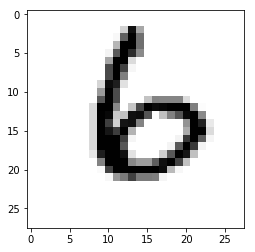

In [9]:
sample=random.choice(mnist.train.images)

def show_digits(pixels):
    img=pixels.copy().reshape(28,28)
    plt.imshow(img,cmap='gray_r')
    
show_digits(sample)

In [10]:
print(u'Eğitim veriseti: %d' % len(mnist.train.images))
print(u'Test veriseti:  %d' % len(mnist.test.images))

Eğitim veriseti: 55000
Test veriseti:  10000


In [11]:
X=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

W=tf.Variable(tf.truncated_normal(shape=[784,10],stddev=0.1))
b=tf.Variable(tf.constant(shape=[10],value=0.1))


In [12]:
y_pred =tf.nn.softmax(tf.matmul(X,W)+b)

loss=tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred),reduction_indices=[1]))

optimizer=tf.train.GradientDescentOptimizer(0.05).minimize(loss)

correct_predicitons=tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy=tf.reduce_mean(tf.cast(correct_predicitons,tf.float32))

In [14]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    xs,ys=mnist.train.next_batch(128)
    
    sess.run(optimizer,feed_dict={X:xs,y:ys})
    
    if i % 500 ==0:
        acc = sess.run(accuracy,feed_dict={X:mnist.test.images,
                                          y:mnist.test.labels})
        print("[*] Step:%d , test_accuracy:%.2f%%" % (i,acc *100))

[*] Step:0 , test_accuracy:10.44%
[*] Step:500 , test_accuracy:88.30%
[*] Step:1000 , test_accuracy:89.87%
[*] Step:1500 , test_accuracy:90.20%
[*] Step:2000 , test_accuracy:90.67%
[*] Step:2500 , test_accuracy:90.91%
[*] Step:3000 , test_accuracy:91.05%
[*] Step:3500 , test_accuracy:91.34%
[*] Step:4000 , test_accuracy:91.48%
[*] Step:4500 , test_accuracy:91.59%
[*] Step:5000 , test_accuracy:91.61%
[*] Step:5500 , test_accuracy:91.75%
[*] Step:6000 , test_accuracy:91.64%
[*] Step:6500 , test_accuracy:91.81%
[*] Step:7000 , test_accuracy:91.86%
[*] Step:7500 , test_accuracy:91.88%
[*] Step:8000 , test_accuracy:91.90%
[*] Step:8500 , test_accuracy:92.05%
[*] Step:9000 , test_accuracy:92.06%
[*] Step:9500 , test_accuracy:92.13%


Resmin 0 olma ihtimali: 0.02%
Resmin 1 olma ihtimali: 0.00%
Resmin 2 olma ihtimali: 0.04%
Resmin 3 olma ihtimali: 1.79%
Resmin 4 olma ihtimali: 0.00%
Resmin 5 olma ihtimali: 37.65%
Resmin 6 olma ihtimali: 0.00%
Resmin 7 olma ihtimali: 1.66%
Resmin 8 olma ihtimali: 58.80%
Resmin 9 olma ihtimali: 0.04%


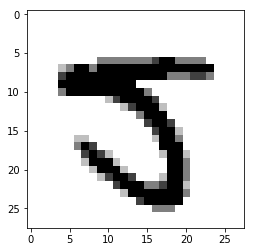

In [19]:
sample =random.choice(mnist.test.images)

predictions=sess.run(y_pred,feed_dict={X:[sample]})[0]

for i,v in enumerate(predictions):
    print(u'Resmin %d olma ihtimali: %.2f%%' % (i,v *100))
    
show_digits(sample)